Here we use a simple linear model and article content with `CountVectorizer`.

Import libraries.

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import json
from tqdm import tqdm_notebook
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_absolute_error

The following code will help to throw away all HTML tags from an article content.

In [2]:
from html.parser import HTMLParser

class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ''.join(self.fed)

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [3]:
PATH_TO_DATA = 'E:/data/'

Assume you have all data downloaded from competition's [page](https://www.kaggle.com/c/how-good-is-your-medium-article/data) in the PATH_TO_DATA folder and `.gz` files are ungzipped.

In [4]:
!ls -l $PATH_TO_DATA

'ls' is not recognized as an internal or external command,
operable program or batch file.


Supplementary function to read a JSON line without crashing on escape characters. 

In [5]:
def read_json_line(line=None):
    result = None
    try:        
        result = json.loads(line)
    except Exception as e:      
        # Find the offending character index:
        idx_to_replace = int(str(e).split(' ')[-1].replace(')',''))      
        # Remove the offending character:
        new_line = list(line)
        new_line[idx_to_replace] = ' '
        new_line = ''.join(new_line)     
        return read_json_line(line=new_line)
    return result

This function takes a JSON and forms a txt file leaving only article content. When you resort to feature engineering and extract various features from articles, a good idea is to modify this function.

In [6]:
def preprocess(path_to_inp_json_file):
    output_list = []
    with open(path_to_inp_json_file, encoding='utf-8') as inp_file:
        for line in tqdm_notebook(inp_file):
            json_data = read_json_line(line)
            content = json_data['content'].replace('\n', ' ').replace('\r', ' ')
            content_no_html_tags = strip_tags(content)
            output_list.append(content_no_html_tags)
    return output_list

In [173]:
def get_feature(path_to_inp_json_file, feature_name):
    output_list = []
    with open(path_to_inp_json_file, encoding='utf-8') as inp_file:
        for line in tqdm_notebook(inp_file):
       #     print(line)
            json_data = read_json_line(line)
            content = json_data[feature_name]
          #  print(content)
            #content_no_html_tags = strip_tags(content)
            output_list.append(content)
           # return output_list
    return output_list

In [212]:
def get_date(path_to_inp_json_file):
    output_list = []
    with open(path_to_inp_json_file, encoding='utf-8') as inp_file:
        for line in tqdm_notebook(inp_file):
       #     print(line)
            json_data = read_json_line(line)
            content = pd.to_datetime(json_data['published']['$date'])
          #  print(content)
            #content_no_html_tags = strip_tags(content)
            output_list.append(content)
          #  return output_list
    return output_list

In [213]:
%%time
dates = get_date(os.path.join(PATH_TO_DATA,'train.json'))

A Jupyter Widget


Wall time: 59.3 s


In [265]:
def get_image(path_to_inp_json_file):
    output_list = []
    with open(path_to_inp_json_file, encoding='utf-8') as inp_file:
        for line in tqdm_notebook(inp_file):
       #     print(line)
            json_data = read_json_line(line)
            content = json_data['image_url']
           # print(content)
            #content_no_html_tags = strip_tags(content)
            output_list.append(content)
           # return output_list
    return output_list;


In [266]:
%%time
images = get_image(os.path.join(PATH_TO_DATA,'train.json'))

A Jupyter Widget

Wall time: 44.9 s


In [267]:
df['image'] = images

In [283]:
df[df['image'].isnull()]

,date,y,months_count,year,month,day_of_week,image
0,2012-08-13 22:54:53.510,9.01201,24152,2012,8,0,None
1,2015-08-03 07:44:50.331,3.49651,24188,2015,8,0,None
12,2016-09-08 15:47:57.336,2.63906,24201,2016,9,3,None
23,2016-12-13 17:59:40.527,1.09861,24204,2016,12,1,None
32,2012-08-13 22:57:17.248,8.53719,24152,2012,8,0,None
40,2015-09-28 19:00:10.843,6.90875,24189,2015,9,0,None
51,2015-11-04 22:21:24.123,4.61512,24191,2015,11,2,None
75,2017-05-16 21:15:45.066,2.89037,24209,2017,5,1,None
79,2017-04-09 15:07:43.600,1.38629,24208,2017,4,6,None
83,2017-01-29 02:48:32.202,1.60944,24205,2017,1,6,None


In [211]:
dates[0].year

2012

In [174]:
%%time
_timestamps = get_feature(os.path.join(PATH_TO_DATA,'train.json'),'_timestamp')

A Jupyter Widget


Wall time: 1min 1s


In [180]:
from scipy.sparse import csr_matrix, hstack

In [177]:
len(_timestamps)

62313

In [178]:
X_train.shape[0]

62313

In [183]:
X_train_time = csr_matrix(hstack([X_train, 
                             np.reshape(_timestamps,(-1, 1))]))

In [7]:
%%time
train_raw_content = preprocess(path_to_inp_json_file=os.path.join(PATH_TO_DATA, 
                                                                  'train.json'),)

A Jupyter Widget


Wall time: 10min 2s


In [8]:
%%time
test_raw_content = preprocess(path_to_inp_json_file=os.path.join(PATH_TO_DATA, 
                                                                  'test.json'),)

A Jupyter Widget


Wall time: 5min 51s


We'll use a linear model (`Ridge`) with a very simple feature extractor – `CountVectorizer`, meaning that we resort to the Bag-of-Words approach. For now, we are leaving only 50k features. 

In [9]:
cv = CountVectorizer(max_features=50000)

In [10]:
%%time
X_train = cv.fit_transform(train_raw_content)

Wall time: 2min 37s


In [11]:
%%time
X_test = cv.transform(test_raw_content)

Wall time: 1min 14s


In [12]:
X_train.shape, X_test.shape

((62313, 50000), (34645, 50000))

Read targets from file.

In [13]:
train_target = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_log1p_recommends.csv'), 
                           index_col='id')

In [14]:
train_target.shape

(62313, 1)

In [18]:
X_train

<62313x50000 sparse matrix of type '<class 'numpy.int64'>'
	with 33479333 stored elements in Compressed Sparse Row format>

In [16]:
y_train = train_target['log_recommends'].values

Make a 30%-holdout set. 

In [17]:
train_part_size = int(0.7 * train_target.shape[0])
X_train_part = X_train[:train_part_size, :]
y_train_part = y_train[:train_part_size]
X_valid =  X_train[train_part_size:, :]
y_valid = y_train[train_part_size:]

Now we are ready to fit a linear model.

In [19]:
from sklearn.linear_model import Ridge

In [20]:
ridge = Ridge(random_state=17)

In [21]:
%%time
ridge.fit(X_train_part, y_train_part);

Wall time: 4min 47s


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=17, solver='auto', tol=0.001)

In [22]:
ridge_pred = ridge.predict(X_valid)

Let's plot predictions and targets for the holdout set. Recall that these are #recommendations (= #claps) of Medium articles with the `np.log1p` transformation.

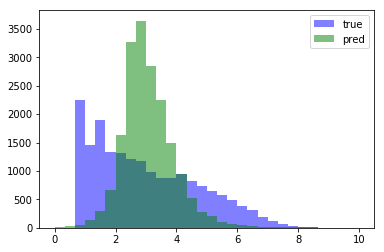

In [24]:
plt.hist(y_valid, bins=30, alpha=.5, color='blue', label='true', range=(0,10));
plt.hist(ridge_pred, bins=30, alpha=.5, color='green', label='pred', range=(0,10));
plt.legend();

As we can see, the prediction is far from perfect, and we get MAE $\approx$ 1.3 that corresponds to $\approx$ 2.7 error in #recommendations.

In [27]:
valid_mae = mean_absolute_error(y_valid, ridge_pred)
valid_mae, np.expm1(valid_mae)

(1.3060947121324362, 5.765593576161411)

Finally, train the model on the full accessible training set, make predictions for the test set and form a submission file. 

In [ ]:
%%time
ridge.fit(X_train, y_train);

In [ ]:
%%time
ridge_test_pred = ridge.predict(X_test)

In [26]:
def write_submission_file(prediction, filename,
    path_to_sample=os.path.join(PATH_TO_DATA, 'sample_submission.csv')):
    submission = pd.read_csv(path_to_sample, index_col='id')
    
    submission['log_recommends'] = prediction
    submission.to_csv(filename)

In [ ]:
write_submission_file(prediction=ridge_test_pred, 
                      filename='first_ridge.csv')

With this, you'll get 1.91185 on [public leaderboard](https://www.kaggle.com/c/how-good-is-your-medium-article/leaderboard). This is much higher than our validation MAE. This indicates that the target distribution in test set somewhat differs from that of the training set (recent Medium articles are more popular). This shouldn't confuse us as long as we see a correlation between local improvements and improvements on the leaderboard. 

Some ideas for improvement:
- Engineer good features, this is the key to success. Some simple features will be based on publication time, authors, content length and so on
- You may not ignore HTML and extract some features from there
- You'd better experiment with your validation scheme. You should see a correlation between your local improvements and LB score
- Try TF-IDF, ngrams, Word2Vec and GloVe embeddings
- Try various NLP techniques like stemming and lemmatization
- Tune hyperparameters. In our example, we've left only 50k features and used `C`=1 as a regularization parameter, this can be changed 
- SGD and Vowpal Wabbit will learn much faster
- In our course, we don't cover neural nets. But it's not obliged to use GRUs or LSTMs in this competition. 

In [78]:
from sklearn import linear_model
clf = linear_model.GradientBoostingClassifier ()
clf.fit(X_train_part, y_train_part)

AttributeError: module 'sklearn.linear_model' has no attribute 'GradientBoostingClassifier'

In [76]:
sgd_pred = clf.predict(X_train_part)

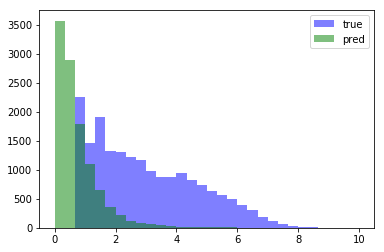

In [58]:
plt.hist(y_valid, bins=30, alpha=.5, color='blue', label='true', range=(0,10));
plt.hist(sgd_pred/1000000000000, bins=30, alpha=.5, color='green', label='pred', range=(0,10));
plt.legend();

In [60]:
y_train_part

array([ 9.01201,  3.49651,  0.69315, ...,  5.45959,  3.73767,  4.72739])

In [77]:
sgd_pred

array([  1.40398333e+10,   1.61621066e+12,   1.07032325e+11, ...,
        -4.51666251e+11,  -4.64482133e+10,   1.74456485e+11])

In [38]:
ridge_pred

array([ 3.26194404,  3.32099515,  2.57348991, ...,  2.63458605,
        3.15779024,  2.77996911])

In [48]:
valid_mae = mean_absolute_error(y_valid, sgd_pred/5000000000000+2)
valid_mae, np.expm1(valid_mae)

(1.8501246303527088, 5.3606121985468134)

In [61]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
scaler.fit(y_train_part.reshape(-1, 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
y_train_part.reshape(-1, 1)

array([[ 9.01201],
       [ 3.49651],
       [ 0.69315],
       ..., 
       [ 5.45959],
       [ 3.73767],
       [ 4.72739]])

In [68]:
sgd_pred_scaled = scaler.transform(sgd_pred.reshape(-1, 1))

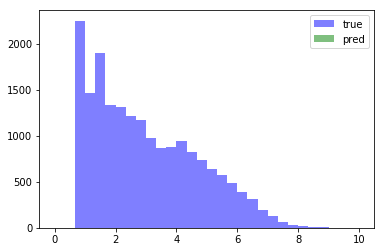

In [69]:
plt.hist(y_valid, bins=30, alpha=.5, color='blue', label='true', range=(0,10));
plt.hist(sgd_pred_scaled, bins=30, alpha=.5, color='green', label='pred', range=(0,10));
plt.legend();

In [71]:
sgd_pred_scaled

array([[ -1.36440859e+11],
       [ -1.12201615e+11],
       [  2.79538510e+11],
       ..., 
       [  2.81371192e+10],
       [  4.25761413e+11],
       [ -5.48483369e+10]])

In [72]:
sgd_pred

array([ -2.72312934e+11,  -2.23935493e+11,   5.57911703e+11, ...,
         5.61569427e+10,   8.49747946e+11,  -1.09468027e+11])

In [75]:
y_train_part.mean()

22004148229.823185

In [84]:
import numpy as np
from catboost import Pool, CatBoostRegressor

In [83]:
!pip install catboost

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [87]:
# specify the training parameters 
model = CatBoostRegressor(iterations=2, depth=2, learning_rate=1, loss_function='RMSE')
#train the model
model.fit(X_train_part, y_train_part)

CatboostError: Invalid data type=<class 'scipy.sparse.csr.csr_matrix'>: data must be list(), np.ndarray(), DataFrame(), Series() or filename str().

In [89]:
X_train_part

<43619x50000 sparse matrix of type '<class 'numpy.int64'>'
	with 23399117 stored elements in Compressed Sparse Row format>

In [90]:
y_train_part

array([ 9.01201,  3.49651,  0.69315, ...,  5.45959,  3.73767,  4.72739])

In [95]:
!pip install --upgrade xgboost

  Using cached xgboost-0.7.post4.tar.gz


No files/directories in C:\Users\AGILED~1\AppData\Local\Temp\pip-build-rnrv46qh\xgboost\pip-egg-info (from PKG-INFO)
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [100]:
from xgboost import XGBRegressor

In [ ]:
XGBRegressor

In [99]:
!pip install xgboost-0.7-cp36-cp36m-win_amd64.whl

Processing c:\users\agiledeveloper\xgboost-0.7-cp36-cp36m-win_amd64.whl


You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [101]:
# specify the training parameters 
model = XGBRegressor()
#train the model
model.fit(X_train_part, y_train_part)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [102]:
xgb_pred = model.predict(X_valid)

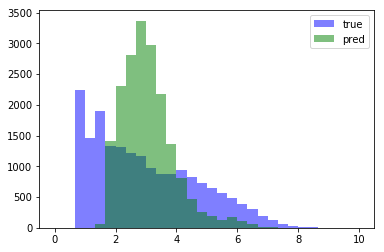

In [103]:
plt.hist(y_valid, bins=30, alpha=.5, color='blue', label='true', range=(0,10));
plt.hist(xgb_pred, bins=30, alpha=.5, color='green', label='pred', range=(0,10));
plt.legend();

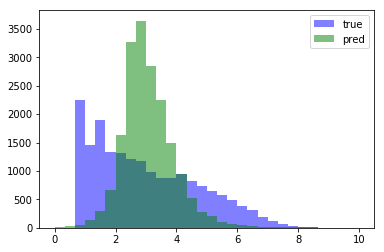

In [104]:
plt.hist(y_valid, bins=30, alpha=.5, color='blue', label='true', range=(0,10));
plt.hist(ridge_pred, bins=30, alpha=.5, color='green', label='pred', range=(0,10));
plt.legend();

In [105]:
valid_mae = mean_absolute_error(y_valid, xgb_pred)
valid_mae, np.expm1(valid_mae)

(1.2545164972503908, 2.506142734799627)

In [107]:
model.fit(X_train, y_train);

In [108]:
xgb_test_pred = model.predict(X_test)

In [106]:
def write_submission_file(prediction, filename,
    path_to_sample=os.path.join(PATH_TO_DATA, 'sample_submission.csv')):
    submission = pd.read_csv(path_to_sample, index_col='id')
    
    submission['log_recommends'] = prediction
    submission.to_csv(filename)


In [157]:
write_submission_file(prediction=xgb_test_predh, 
                      filename='xgbh.csv')

In [113]:
from sklearn.metrics import accuracy_score

In [152]:
write_submission_file(pred2, 
                      'pred_hack.csv')

In [125]:
zeros=np.zeros_like(y_train)

In [126]:
valid_mae = mean_absolute_error(y_train, zeros)
valid_mae, np.expm1(valid_mae)

(3.0515385982058318, 20.147857459420791)

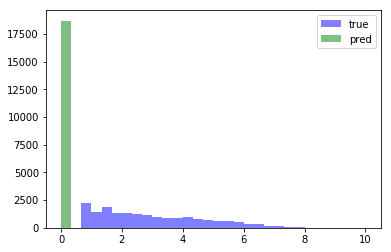

In [119]:
plt.hist(y_valid, bins=30, alpha=.5, color='blue', label='true', range=(0,10));
plt.hist(zeros, bins=30, alpha=.5, color='green', label='pred', range=(0,10));
plt.legend();

In [122]:
4.3*xgb_test_pred.shape[0]

148973.5

In [326]:
xgb_test_pred.sum()/xgb_test_pred.shape[0]

3.1261232230480589

In [394]:
xgb_test_predh=xgb_test_pred*4.3/3.1261232230480589

In [395]:
xgb_test_predh.sum()/xgb_test_pred.shape[0]

4.3000004510030303

In [ ]:
xgb_test_predh=xgb_test_predh*4.3/3.1261232230480589

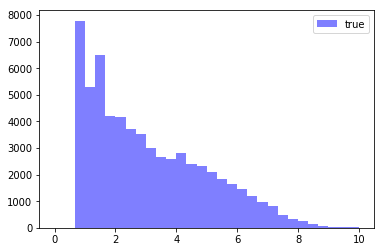

In [124]:
plt.hist(y_train, bins=30, alpha=.5, color='blue', label='true', range=(0,10));
plt.legend();

In [130]:
y_pred = y_train * 148973.5 / 186939

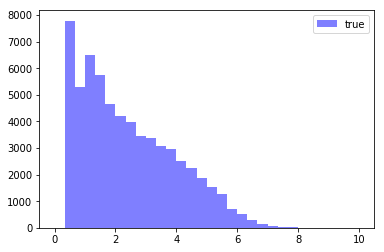

In [131]:
plt.hist(y_pred, bins=30, alpha=.5, color='blue', label='true', range=(0,10));
plt.legend();

In [132]:
y_train.sum()

190150.52467000001

In [133]:
y_pred.sum()

151532.79511993885

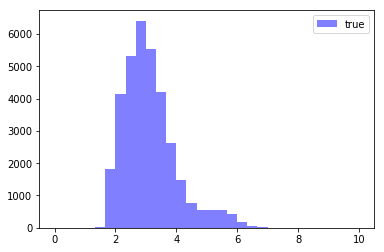

In [134]:
plt.hist(xgb_test_pred, bins=30, alpha=.5, color='blue', label='true', range=(0,10));
plt.legend();

In [135]:
%time
model2 = XGBRegressor()
model2.fit(X_train, y_pred);

Wall time: 0 ns


In [139]:
pred2 = model2.predict(X_test)

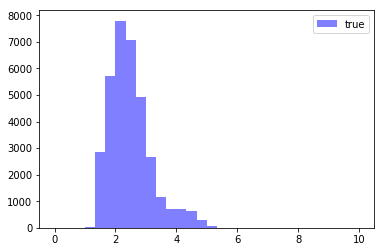

In [140]:
plt.hist(pred2, bins=30, alpha=.5, color='blue', label='true', range=(0,10));
plt.legend();

In [151]:
pred2.sum()

86309.023

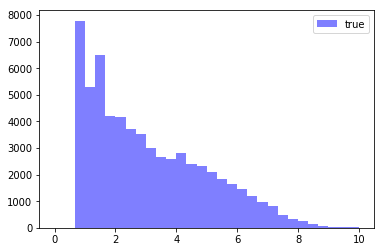

In [141]:
plt.hist(y_train, bins=30, alpha=.5, color='blue', label='true', range=(0,10));
plt.legend();

In [145]:
np.log(2)

0.69314718055994529

In [148]:
np.exp(0.69314718055994529)

2.0

In [149]:
y_exp = np.exp(y_train)

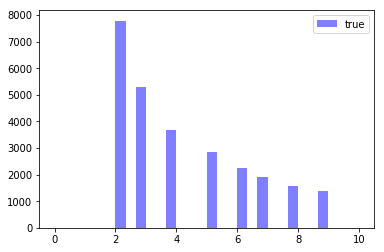

In [150]:
plt.hist(y_exp, bins=30, alpha=.5, color='blue', label='true', range=(0,10));
plt.legend();

In [184]:
train_part_size = int(0.7 * train_target.shape[0])
X_train_time_part = X_train_time[:train_part_size, :]
X_time_valid =  X_train_time[train_part_size:, :]

In [185]:
model = XGBRegressor()
#train the model
model.fit(X_train_time_part, y_train_part)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [186]:
xgb_time_pred = model.predict(X_time_valid)

In [187]:
valid_mae = mean_absolute_error(y_valid, xgb_time_pred)
valid_mae, np.expm1(valid_mae)

(2.0371261487405898, 6.6685392599976652)

In [188]:
scaler = StandardScaler()
scaler.fit(np.reshape(_timestamps,(-1, 1)))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [189]:
X_train_time_s = csr_matrix(hstack([X_train, 
                             scaler.transform(np.reshape(_timestamps,(-1, 1)))]))

In [190]:
train_part_size = int(0.7 * train_target.shape[0])
X_train_time_s_part = X_train_time_s[:train_part_size, :]
X_time_s_valid =  X_train_time_s[train_part_size:, :]

In [191]:
%time
model.fit(X_train_time_s_part, y_train_part)

Wall time: 0 ns


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [192]:
xgb_time_s_pred = model.predict(X_time_s_valid)

In [193]:
valid_mae = mean_absolute_error(y_valid, xgb_time_s_pred)
valid_mae, np.expm1(valid_mae)

(2.0545991659453584, 6.8037092532279715)

In [196]:
scaler.transform(np.reshape(_timestamps,(-1, 1)))

array([[ 1.28610066],
       [-2.28025562],
       [-2.2802285 ],
       ..., 
       [ 1.55011145],
       [ 1.55011652],
       [ 1.55011906]])

In [199]:
dt= pd.to_datetime(_timestamps,unit='ms')

In [202]:
dt.max()

Timestamp('1970-01-18 14:14:46.969258')

In [203]:
dt.min()

Timestamp('1970-01-18 14:02:15.833265')

In [214]:
X_train_dates = csr_matrix(hstack([X_train, np.reshape(dates,(-1, 1))]))

TypeError: no supported conversion for types: (dtype('int64'), dtype('O'))

In [215]:
dates

[Timestamp('2012-08-13 22:54:53.510000'),
 Timestamp('2015-08-03 07:44:50.331000'),
 Timestamp('2017-02-05 13:08:17.410000'),
 Timestamp('2017-05-06 08:16:30.776000'),
 Timestamp('2017-06-04 14:46:25.772000'),
 Timestamp('2017-04-02 16:21:15.171000'),
 Timestamp('2016-08-15 04:16:02.103000'),
 Timestamp('2015-01-14 21:31:07.568000'),
 Timestamp('2014-02-11 04:11:54.771000'),
 Timestamp('2015-10-25 02:58:05.551000'),
 Timestamp('2016-08-15 15:31:13.601000'),
 Timestamp('2016-08-09 21:01:06.303000'),
 Timestamp('2016-09-08 15:47:57.336000'),
 Timestamp('2016-09-30 18:05:35.950000'),
 Timestamp('2017-06-27 15:49:22.909000'),
 Timestamp('2015-07-13 06:52:44.618000'),
 Timestamp('2017-05-01 13:22:43.785000'),
 Timestamp('2016-08-31 17:11:24.263000'),
 Timestamp('2017-06-30 07:55:55.103000'),
 Timestamp('2016-12-13 23:29:35.556000'),
 Timestamp('2016-01-27 22:19:05.027000'),
 Timestamp('2016-12-14 01:15:02.122000'),
 Timestamp('2016-09-05 22:02:40.326000'),
 Timestamp('2016-12-13 17:59:40.52

In [216]:
y_train

array([ 9.01201,  3.49651,  0.69315, ...,  3.55535,  1.09861,  4.43082])

In [217]:
df = pd.DataFrame(
    {'date': dates,
     'y': y_train
    })

In [218]:
df.head()

,date,y
0,2012-08-13 22:54:53.510,9.01201
1,2015-08-03 07:44:50.331,3.49651
2,2017-02-05 13:08:17.410,0.69315
3,2017-05-06 08:16:30.776,1.38629
4,2017-06-04 14:46:25.772,1.94591


In [219]:
df['months_count'] = df['date'].apply(lambda ts: 12 * ts.year + ts.month)

In [226]:
df['year'] = df['date'].apply(lambda ts: ts.year)

In [249]:
df['month'] = df['date'].apply(lambda ts: ts.month)

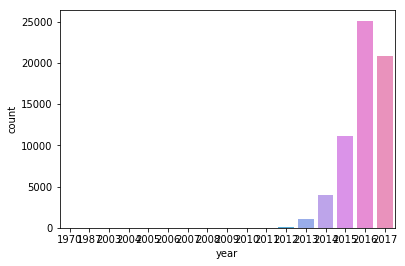

In [230]:
sns.countplot(x="year", data=df)

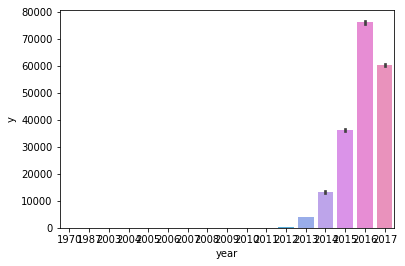

In [228]:
sns.barplot(x="year", y="y", data=df, estimator=sum)

In [221]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

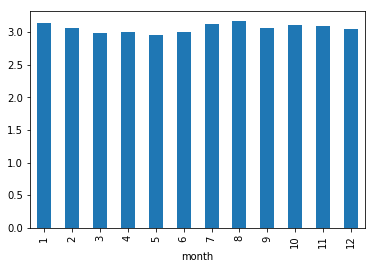

In [256]:
df[df["year"]<2021].groupby(['month'])['y'].mean().plot(kind='bar')

plt.show()

In [253]:
df['day_of_week'] = df['date'].apply(lambda ts: ts.weekday())

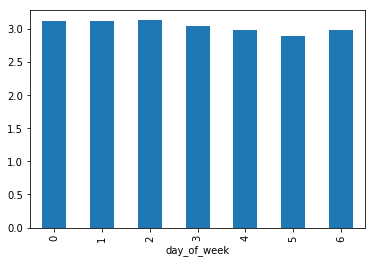

In [257]:
df[df["year"]<2021].groupby(['day_of_week'])['y'].mean().plot(kind='bar')

plt.show()

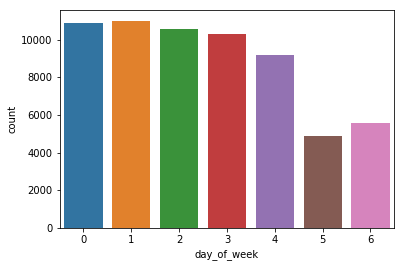

In [258]:
sns.countplot(x="day_of_week", data=df)

In [286]:
df['has_image']= df['image'].isnull() == False

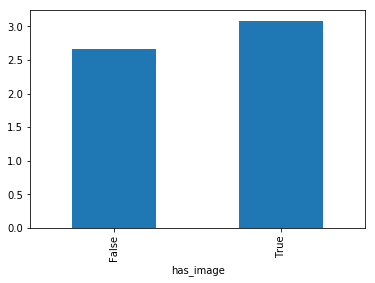

In [287]:
df.groupby(['has_image'])['y'].mean().plot(kind='bar')

plt.show()

In [299]:
X_train_image = csr_matrix(hstack([X_train, df['has_image'].astype(int).values.reshape(-1, 1)]))

In [298]:
df['has_image'].values

array([False, False,  True, ...,  True,  True,  True], dtype=bool)

In [300]:
train_part_size = int(0.7 * train_target.shape[0])
X_train_image_part = X_train_image[:train_part_size, :]
X_train_image_valid =  X_train_image[train_part_size:, :]

In [302]:
%%time
model.fit(X_train_image_part, y_train_part)

Wall time: 4min 10s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [303]:
xgb_image_pred = model.predict(X_train_image_valid)

In [305]:
valid_mae = mean_absolute_error(y_valid, xgb_image_pred)
valid_mae, np.expm1(valid_mae)

(1.2502912374655322, 2.4913596241371376)

In [307]:
%%time
model.fit(X_train_image, y_train);

Wall time: 5min 53s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [308]:
images_test = get_image(os.path.join(PATH_TO_DATA,'test.json'))

A Jupyter Widget

In [319]:
np.unique(pd.isnull(images_test).astype(int), return_counts=True)

(array([0, 1]), array([32711,  1934], dtype=int64))

In [ ]:
images

In [320]:
X_test_image = csr_matrix(hstack([X_test, np.reshape(pd.isnull(images_test).astype(int),(-1, 1))]))

In [321]:
xgb_image_pred = model.predict(X_test_image)

In [322]:
xgb_image_pred.sum()/xgb_image_pred.shape[0]

2.9863975230913553

In [375]:
xgb_image_pred_h=xgb_image_pred*4.33328/2.9863975230913553

In [376]:
xgb_image_pred_h.sum()/xgb_image_pred.shape[0]

4.3332799646413624

In [377]:
write_submission_file(prediction=xgb_image_pred_h, 
                      filename='xgb_image_pred_h.csv')

In [ ]:
write_submission_file(prediction=xgb_test_predh, 
                      filename='xgb_h2.csv')

In [335]:
def get_author(path_to_inp_json_file):
    output_list = []
    with open(path_to_inp_json_file, encoding='utf-8') as inp_file:
        for line in tqdm_notebook(inp_file):
       #     print(line)
            json_data = read_json_line(line)
            content = json_data['author']['url']
          #  print(content)
            #content_no_html_tags = strip_tags(content)
            output_list.append(content)
           # return output_list
    return output_list;


In [336]:
authors_train = get_author((os.path.join(PATH_TO_DATA,'train.json')))

A Jupyter Widget

In [337]:
df["authors"]=authors_train

In [338]:
df["authors"].value_counts()

https://medium.com/@warisboring                     305
https://medium.com/@jonwestenberg                   195
https://medium.com/@jaltucher                       115
https://medium.com/@startswithabang                 112
https://medium.com/@larrykim                        105
https://medium.com/@dariusforoux                    104
https://jw-webmagazine.com/@naho617mi                93
https://medium.com/@alltopstartups                   92
https://medium.com/@_ericelliott                     87
https://medium.com/@jspector                         78
https://medium.com/@benjaminhardy                    72
https://medium.com/@ObamaWhiteHouse                  70
https://medium.com/@NetflixTechBlog                  69
https://medium.com/@chrisdconnors                    64
https://medium.com/@nancypong                        62
https://medium.com/@helena                           57
https://medium.com/@TheAwl                           57
https://medium.com/@joulee                      

In [340]:
df.groupby(['authors'])['y'].mean().head().plot(kind='bar')

plt.show()

KeyboardInterrupt: 

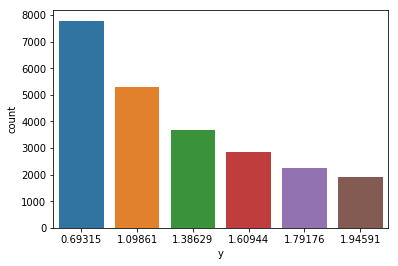

In [342]:
sns.countplot(x="y", data=df[df["y"]<2])

In [348]:
df.groupby(['authors'])['y'].mean().head()

authors
https://1927-the-diary-of-myles-thomas.espn.com/@1927dmtTeam      1.05935
https://1927-the-diary-of-myles-thomas.espn.com/@MylesThomas27    2.52493
https://42hire.com/@GusRazzetti                                   4.89784
https://42hire.com/@danielvlopes                                  3.78419
https://42hire.com/@marieburns                                    2.39790
Name: y, dtype: float64

In [349]:
authors_test = get_author((os.path.join(PATH_TO_DATA,'test.json')))

A Jupyter Widget

In [351]:
type(df["authors"])

pandas.core.series.Series

In [360]:
df["authors"].value_counts().shape

(32182,)

In [359]:
df.shape

(62313, 9)

In [358]:
X_train.shape

(62313, 50000)

In [364]:
df["authors"].shape[0]

62313

In [401]:
X_train_author = csr_matrix(hstack([X_train, csr_matrix(pd.get_dummies(df["authors"]))]))

In [ ]:
X_test_author = csr_matrix(hstack([X_train, csr_matrix(pd.get_dummies(df["authors"]))]))

In [400]:
csr_matrix(pd.get_dummies(df["authors"]))

<62313x32182 sparse matrix of type '<class 'numpy.uint8'>'
	with 62313 stored elements in Compressed Sparse Row format>

In [402]:
X_train_author.shape

(62313, 82182)

In [368]:
authors_flatten = df["authors"].values.flatten()

In [356]:
type(df["authors"][0])

str

In [378]:
y_train

array([ 9.01201,  3.49651,  0.69315, ...,  3.55535,  1.09861,  4.43082])

In [374]:
xgb_test_pred

array([ 3.66986609,  3.52842331,  2.60187292, ...,  2.93503284,
        3.05119348,  3.6636343 ], dtype=float32)

In [388]:
def to_log_value(item):
    return np.log(np.round(np.exp(item)))

In [382]:
np.exp(3.66986609)

39.246649989505435

In [385]:
np.round(2.6)

3.0

In [387]:
np.log(3)

1.0986122886681098

In [392]:
xgb_test_pred_log = list(map(to_log_value, xgb_test_pred))

In [396]:
xgb_test_predh_log = list(map(to_log_value, xgb_test_predh))

In [397]:
write_submission_file(prediction=xgb_test_predh_log, 
                      filename='xgb_test_predh_log.csv')

In [405]:
train_part_size = int(0.7 * train_target.shape[0])
X_train_author_part = X_train_author[:train_part_size, :]
X_train_author_valid =  X_train_author[train_part_size:, :]

In [406]:
%%time
model.fit(X_train_author_part, y_train_part);

Wall time: 4min 18s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [407]:
X_train_author_pred = model.predict(X_train_author_valid)

In [408]:
valid_mae = mean_absolute_error(y_valid, X_train_author_pred)
valid_mae, np.expm1(valid_mae)

(1.2545363152006899, 2.5062122200506121)

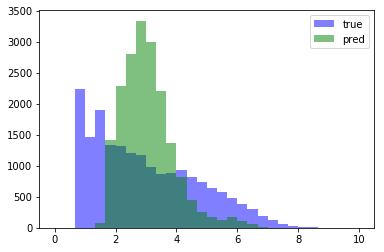

In [409]:
plt.hist(y_valid, bins=30, alpha=.5, color='blue', label='true', range=(0,10));
plt.hist(X_train_author_pred, bins=30, alpha=.5, color='green', label='pred', range=(0,10));
plt.legend();